In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib


**Loading the dataset**

In [6]:
df = pd.read_excel("plant-status.xlsx")

**Exploratory Data Analysis**

Dataset summary statistics:
       Light Intensity  Temperature     Humidity  Soil Moisture
count      2190.000000  2190.000000  2190.000000    2190.000000
mean       6186.887215    25.331553    59.178174       1.009132
std        5060.892551     8.472648    22.248091       0.825534
min         403.000000    11.000000    20.100000       0.000000
25%         874.000000    16.800000    36.900000       0.000000
50%        6187.500000    28.050000    69.150000       1.000000
75%       10859.250000    33.200000    78.175000       2.000000
max       14999.000000    37.000000    90.000000       2.000000

Class distribution in the target column:
Plant Growth Status
Struggling    467
Healthy       449
Growing       428
Dormant       427
Thriving      419
Name: count, dtype: int64

Data visualization:


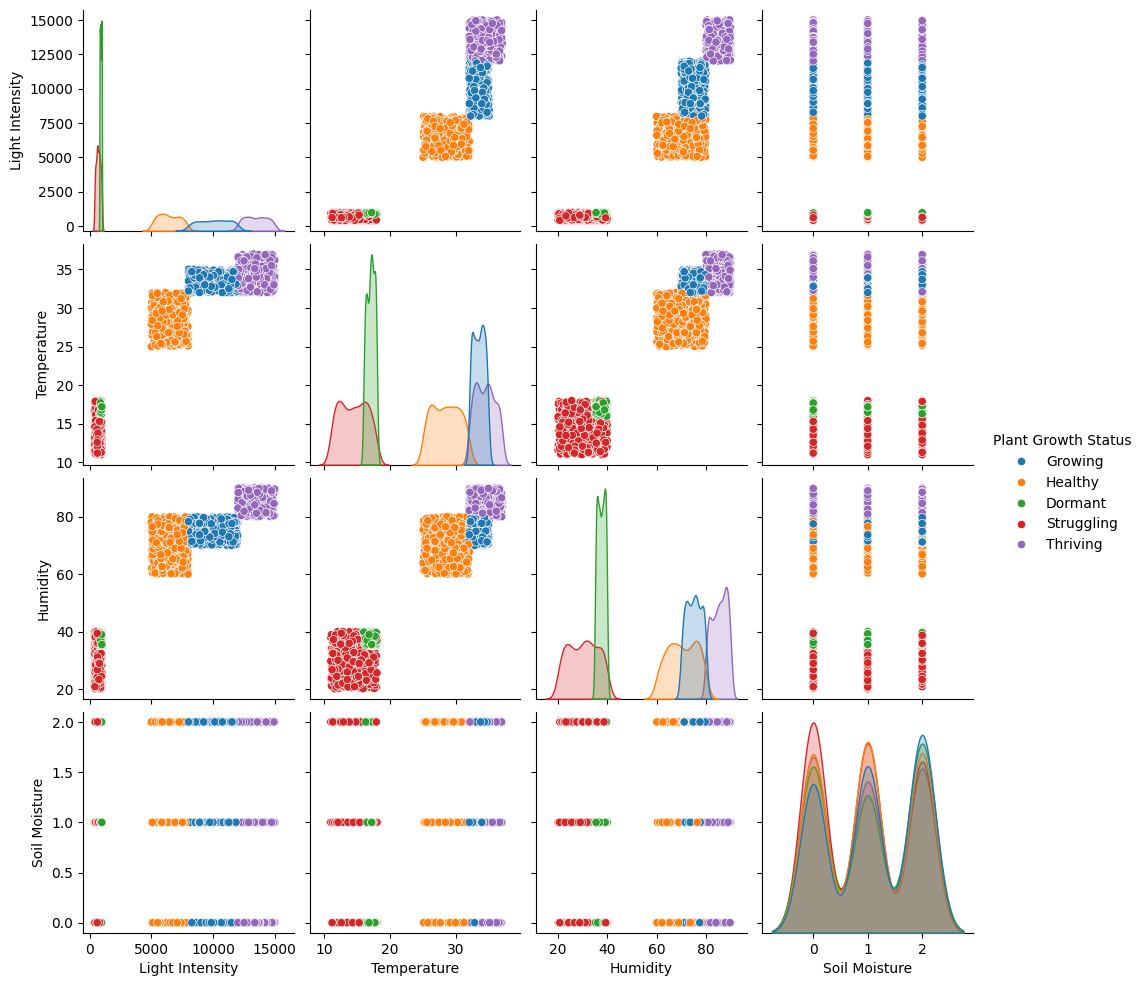

In [7]:
print("Dataset summary statistics:")
print(df.describe())

print("\nClass distribution in the target column:")
print(df['Plant Growth Status'].value_counts())

print("\nData visualization:")
sns.pairplot(df, hue='Plant Growth Status', diag_kind='kde')
plt.show()


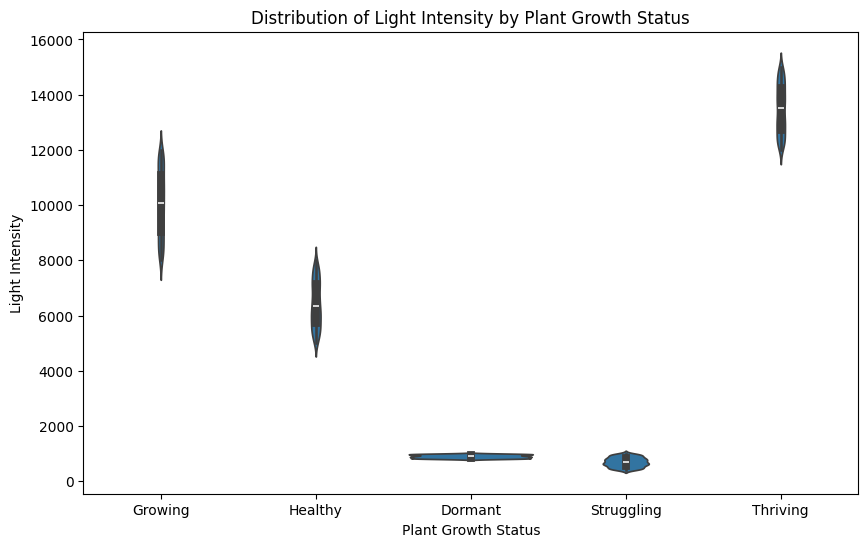

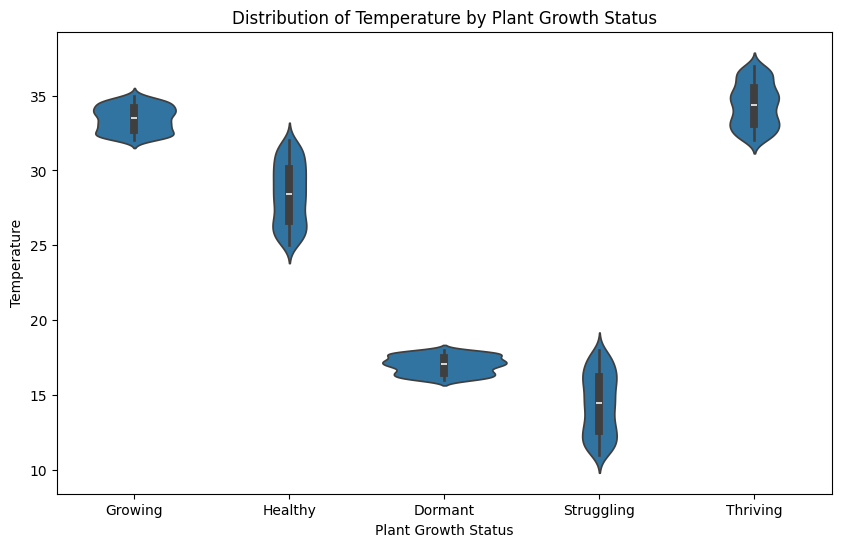

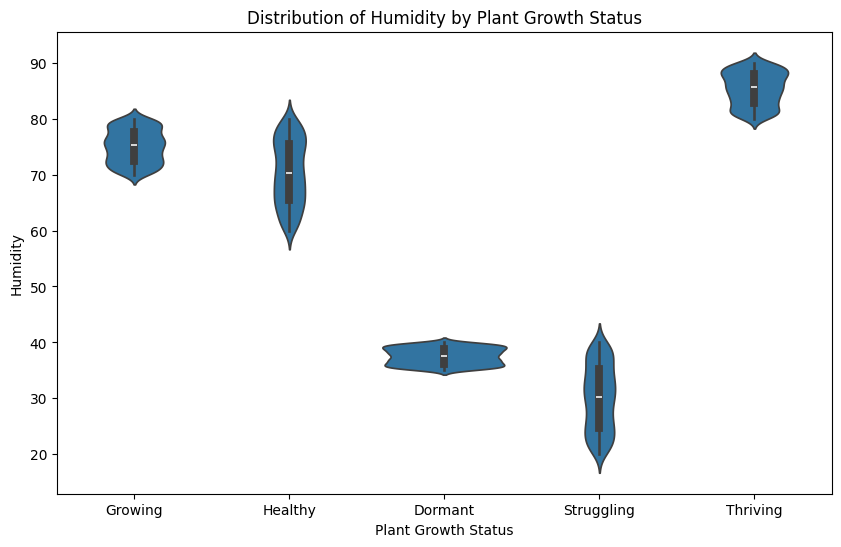

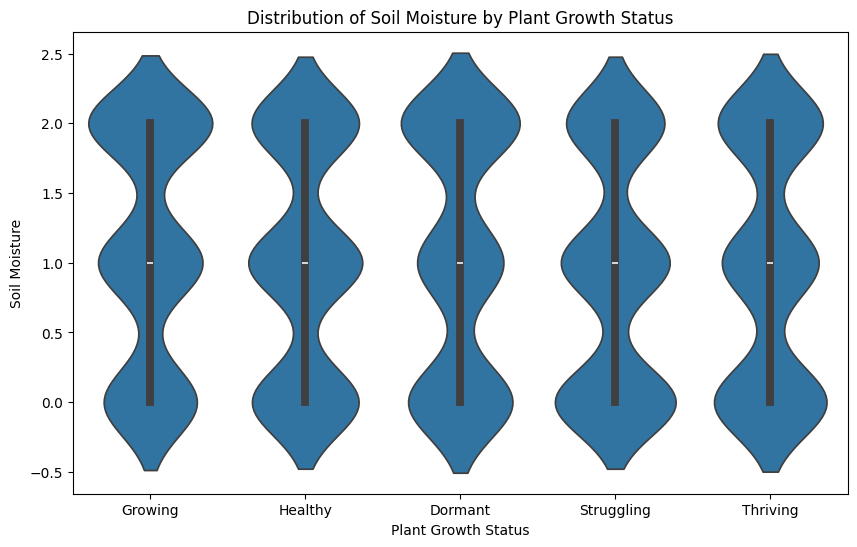

In [8]:
# Distribution of each feature by target class
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Plant Growth Status', y=column, data=df)
    plt.title(f"Distribution of {column} by Plant Growth Status")
    plt.show()


**Splitting the dataset into training and testing sets**

In [9]:
X = df.drop(columns=['Plant Growth Status'])
y = df['Plant Growth Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training multiple machine learning models**

In [10]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {
        "model": model,
        "accuracy": accuracy,
        "f1_score": f1,
        "classification_report": classification_report(y_test, y_pred)
    }



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

**Evaluating models**

In [11]:


for name, result in results.items():
    print(f"\n{name} model evaluation:")
    print(f"Accuracy: {result['accuracy']}")
    print(f"F1 Score: {result['f1_score']}")
    print("Classification Report:")
    print(result['classification_report'])



Random Forest model evaluation:
Accuracy: 0.9954337899543378
F1 Score: 0.9954372645593188
Classification Report:
              precision    recall  f1-score   support

     Dormant       0.98      1.00      0.99        82
     Growing       1.00      1.00      1.00        90
     Healthy       1.00      1.00      1.00        87
  Struggling       1.00      0.98      0.99        96
    Thriving       1.00      1.00      1.00        83

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438


Gradient Boosting model evaluation:
Accuracy: 0.9885844748858448
F1 Score: 0.9885918731108232
Classification Report:
              precision    recall  f1-score   support

     Dormant       0.96      1.00      0.98        82
     Growing       0.99      0.99      0.99        90
     Healthy       1.00      0.99      0.99        87
  Struggling       1.00      0.97      0.98        96
    Thri

**Evaluating models**

In [12]:

best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]['model']
print(f"\nBest model based on F1 Score: {best_model_name}")



Best model based on F1 Score: Random Forest


In [13]:
joblib.dump(best_model, 'plant_growth_model.joblib')
print("Best model saved as 'plant_growth_model.joblib'")


Best model saved as 'plant_growth_model.joblib'
